<a href="https://colab.research.google.com/github/Evaggelou/Arvato-Project-/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
# load pickle objects
X_train = pickle.load(open("/content/drive/MyDrive/Udacity/Arvato/X.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/Udacity/Arvato/y.pickle", "rb"))

In [ ]:
import xgboost as xgb

def xgb_classifier(n_estimators, max_depth, reg_alpha,
                   reg_lambda, min_child_weight, num_boost_round,
                   gamma):
    params = {"booster": 'gbtree',
              "objective" : "binary:logistic",
              "eval_metric" : "auc", 
              "is_unbalance": True,
              "n_estimators": int(n_estimators),
              "max_depth" : int(max_depth),
              "reg_alpha" : reg_alpha,
              "reg_lambda" : reg_lambda,
              "gamma": gamma,
              "num_threads" : 20,
              "min_child_weight" : int(min_child_weight),
              "learning_rate" : 0.01,
              "subsample_freq" : 5,
              "seed" : 42,
              "verbosity" : 0,
              "num_boost_round": int(num_boost_round)}
    train_data = xgb.DMatrix(X_train, y_train)
    cv_result = xgb.cv(params,
                       train_data,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=5)
    return cv_result['test-auc-mean'].iloc[-1]

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=88247d24010e9b13937d661c611b116a281f76380663bc604aa92b7982305040
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization
xgbBO = BayesianOptimization(xgb_classifier, {  "n_estimators": (10, 100),
                                                'max_depth': (5, 40),
                                                'reg_alpha': (0.0, 0.1),
                                                'reg_lambda': (0.0, 0.1),
                                                'min_child_weight': (1, 10),
                                                'num_boost_round': (100, 1000),
                                                "gamma": (0, 10)
                                                })

xgbBO.maximize(n_iter=15, init_points=2)

|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | num_bo... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.7684   |  5.942    |  31.21    |  1.618    |  26.39    |  169.9    |  0.08119  |  0.03545  |
|  2        |  0.77     |  4.92     |  32.44    |  5.263    |  31.87    |  755.0    |  0.00214  |  0.05092  |
|  3        |  0.7704   |  5.32     |  9.874    |  8.833    |  99.82    |  996.6    |  0.04473  |  0.02571  |
|  4        |  0.7585   |  0.1797   |  35.01    |  7.666    |  10.11    |  989.6    |  0.0301   |  0.07668  |
|  5        |  0.7604   |  1.098    |  34.89    |  6.364    |  31.31    |  754.8    |  0.05763  |  0.0085   |
|  6        |  0.769    |  5.61     |  6.598    |  4.068    |  99.93    |  371.5    |  0.03905  |  0.005943 |
|  7        |  0.7691   |  6.348    |  7.251    |  9.345    |  91.56    |  101.6    |  0.01573  |  0.04455  |
|  8      

In [ ]:
print(xgbBO.max)

{'target': 0.7719866, 'params': {'gamma': 9.344310267802172, 'max_depth': 37.69380189729496, 'min_child_weight': 3.169682053860665, 'n_estimators': 97.31789454150781, 'num_boost_round': 916.2029178666784, 'reg_alpha': 0.07845419784387136, 'reg_lambda': 0.095272827193968}}


In [69]:
xgboost = xgb.XGBClassifier(objective = "binary:logistic",
                            eval_metric = "auc", 
                            is_unbalance= True,
                            n_estimators= int(97.31789454150781),
                            max_depth = int(37.69380189729496),
                            reg_alpha = 0.07845419784387136,
                            reg_lambda = 0.095272827193968,
                            gamma= 9.344310267802172,
                            num_threads = 20,
                            min_child_weight = int(3.169682053860665),
                            learning_rate = 0.01,
                            subsample_freq = 5,
                            seed = 42,
                            verbosity = 0,
                            num_boost_round= int(916.2029178666784))
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=9.344310267802172, is_unbalance=True, learning_rate=0.01,
              max_delta_step=0, max_depth=37, min_child_weight=3, missing=None,
              n_estimators=97, n_jobs=1, nthread=None, num_boost_round=916,
              num_threads=20, objective='binary:logistic', random_state=0,
              reg_alpha=0.07845419784387136, reg_lambda=0.095272827193968,
              scale_pos_weight=1, seed=42, silent=None, subsample=1,
              subsample_freq=5, verbosity=0)

In [26]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# load pickle objects
X_test = pickle.load(open("/content/drive/MyDrive/Udacity/Arvato/X_test.pickle", "rb"))
mailout_test = pd.read_csv('/content/drive/MyDrive/Udacity/Arvato/Udacity_MAILOUT_052018_TEST.csv', sep=';')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
mailout_test.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,...,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,SOHO_KZ,STRUKTURTYP,TITEL_KZ,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,2.0,2.0,0.0,3.0,6.0,2B,2,13,5.0,5.0,1.0,2.0,5.0,5.0,5.0,5.0,0,0,10,0,0,0,10,10,0.0,0,3,6,...,3.0,4.0,5.0,2.0,5.0,1.0,3,3,4,2,3,6,7,1,1,1,2,6,1,7,3,0.0,3.0,0.0,2.0,5.0,0.0,23.0,1,1.0,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1,1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,0.0,0.0,1.0,21.0,0.0,4.0,7.0,5A,5,31,1.0,5.0,2.0,2.0,5.0,5.0,4.0,5.0,0,0,10,0,0,0,10,10,0.0,0,0,6,...,4.0,5.0,5.0,1.0,5.0,1.0,3,7,4,3,3,4,5,4,3,3,3,6,1,6,2,0.0,3.0,0.0,4.0,3.0,0.0,0.0,1,1.0,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
2,1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,0.0,0.0,4.0,2.0,0.0,4.0,1.0,7A,7,41,2.0,5.0,2.0,2.0,5.0,5.0,5.0,5.0,0,0,10,0,0,0,10,10,0.0,0,0,0,...,6.0,5.0,5.0,2.0,5.0,1.0,5,7,1,6,4,2,7,1,4,3,1,4,3,3,3,0.0,3.0,0.0,1.0,5.0,1.0,15.0,1,1.0,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
3,1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,2B,2,13,4.0,5.0,2.0,1.0,5.0,5.0,5.0,5.0,0,0,10,0,0,0,10,10,0.0,0,0,0,...,5.0,4.0,5.0,1.0,3.0,1.0,5,7,1,6,7,2,7,2,2,3,2,3,3,2,3,0.0,3.0,0.0,2.0,5.0,0.0,10.0,2,1.0,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
4,1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,0.0,4.0,1.0,0.0,3.0,6.0,5A,5,31,6.0,1.0,3.0,2.0,4.0,4.0,4.0,3.0,3,4,2,2,2,0,8,2,10.0,6,6,6,...,4.0,2.0,3.0,3.0,2.0,3.0,6,7,2,5,4,2,5,2,3,3,2,5,3,3,3,0.0,2.0,0.0,5.0,5.0,0.0,0.0,1,1.0,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4


In [60]:
pickle.dump(xgboost, open("/content/drive/MyDrive/Udacity/Arvato/xgboost.pickle", "wb"))

In [70]:
y_predict = xgboost.predict_proba(X_test)
y_predict[:,1]

array([0.2100762 , 0.2100762 , 0.19316016, ..., 0.20979543, 0.2100762 ,
       0.20979543], dtype=float32)

In [57]:
pd.DataFrame(index=mailout_test.LNR, data=y_predict[:, 1], columns=['RESPONSE']).to_csv("kaggle_predictions.txt")

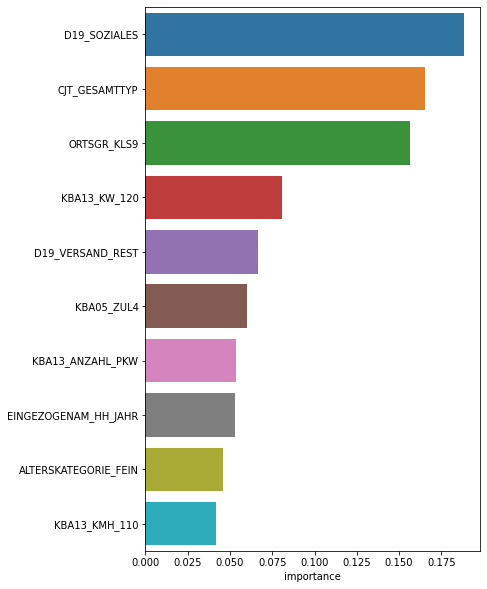

In [80]:
df_importanct=pd.DataFrame(xgboost.feature_importances_.T,index=X_train.columns.values,columns=["importance",])
df_importanct.sort_values(by="importance",ascending=False,inplace=True)

plt.figure(figsize=(6,10))
sns.barplot(x=df_importanct.importance[:10],y=df_importanct.index[:10])
plt.show()